# **Milestone 1** 💎

## I. INTRODUCTION 👋

*   Nama: Karel Gideon Anugrah Hutajulu
*   Batch: FTDS HCK-004



## II. PROBLEM IDENTIFICATION 🔍

The Road Trafic Dataset is sourced from: https://ckan.publishing.service.gov.uk/dataset/road-traffic-accidents  

---


**Problem statement ⭐:** Road traffic accidents result in significant human, economic, and social costs, and are a major public health issue. The mayor of Leeds want to identify the factors that contribute to road traffic accidents.

In order to achieve this, he hired a consultant group named Hactiv8 Consulting. The consultant group will analyze the data to determine the factors that contribute to accident occurrence and severity.

---



**Statement Questions❓:** 

*A. Data Visualization:*

1.   What are the relationship of the environmental factors during the accident with the severity of road accidents in the Year 2017-2019.
2.   Do environmental factors effect the count of road traffic accidents in the Year 2017-2019
3.   What month of the year does road traffic accidents happen the most? And what time of day does road traffic accident happen the most? In year 2017-2019
4. What type of vehicles have the most amount of accident and which type of vehicles experience the most severe crashes in the year 2017-2019
5. Does male or female drivers have a higher likelihood of being involved in a severe accident in the year 2017-2019? 


*B. Descriptive Statistics:*
1. What Age group experience the most road traffic accident in the year 2017-2019

*C. Inferential Statistics:*
1. Is there a relationship/association between the severity of accidents and the number of vehicles involved, or are they unrelated?


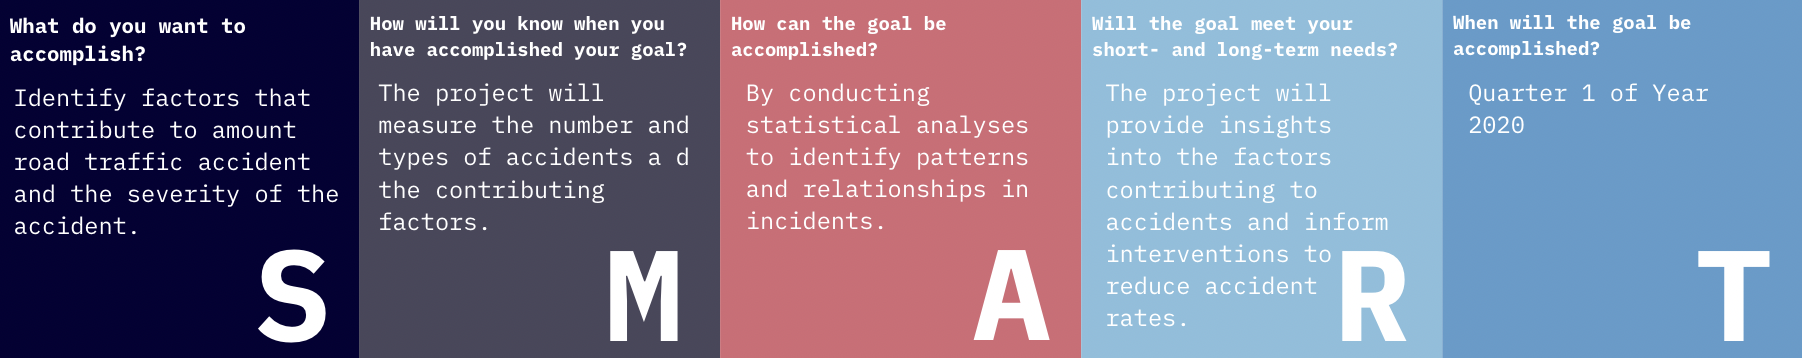

In [217]:
Image('/content/smart_framework.png')

## II. DATA LOADING 💽

**Software Used:** The dataset was queried using SQL Workbench and formatted as code in google colab.

When downloading the dataset from the internet, the files were divided per year `2017,2018,2019`. The Rows also contained numerical values (Id) that is used to refer to another csv file (Like a dictionary). 

For example: In column Weather Condition, the value for a row will be `1`. We then refer to another csv file to find out what `1` means. 


In order to replace the numerical values with its definition from the dictionary, we use the `JOIN` clause to combine rows based on a related column between them `(Category ID)`.


### A) Joining tables

```sql
SELECT *
FROM rtc_2018_leeds
JOIN casualty_class ON casualty_class.`Casualty Class Id` = rtc_2018_leeds.`Casualty Class`
JOIN weather_conditions ON weather_conditions.`Weather Condition Id` = rtc_2018_leeds.`Weather Conditions`
JOIN lighting_conditions ON lighting_conditions.`Lighting Conditions Id` = rtc_2018_leeds.`Lighting Conditions`
JOIN road_surface ON road_surface.`Road Surface Id` = rtc_2018_leeds.`Road Surface`
JOIN sex_casualty ON sex_casualty.`Sex of Casualty Id` = rtc_2018_leeds.`Sex of Casualty`
JOIN type_of_vehicle ON type_of_vehicle.`Type of Vehicle Id` = rtc_2018_leeds.`Type of Vehicle`
JOIN casualty_severity ON casualty_severity.`Casualty Severity Id` = rtc_2018_leeds.`Casualty Severity`;
```

```sql
SELECT *
FROM rtc_2019_leeds
JOIN casualty_class ON casualty_class.`Casualty Class Id` = rtc_2019_leeds.`Casualty Class`
JOIN weather_conditions ON weather_conditions.`Weather Condition Id` = rtc_2019_leeds.`Weather Conditions`
JOIN lighting_conditions ON lighting_conditions.`Lighting Conditions Id` = rtc_2019_leeds.`Lighting Conditions`
JOIN road_surface ON road_surface.`Road Surface Id` = rtc_2019_leeds.`Road Surface`
JOIN sex_casualty ON sex_casualty.`Sex of Casualty Id` = rtc_2019_leeds.`Sex of Casualty`
JOIN type_of_vehicle ON type_of_vehicle.`Type of Vehicle Id` = rtc_2019_leeds.`Type of Vehicle`
JOIN casualty_severity ON casualty_severity.`Casualty Severity Id` = rtc_2019_leeds.`Casualty Severity`;
```

As you can see from the code above, we only join the tables that contain year `2018&2019` data. This is because the year 2017 data does not use a seperate dictionary.





### B) Column Selection
Instead of selecting all the columns from the raw_data table, we only selected several columns that are related to the problem statement (Factors that affect Road Traffic Accident)

The columns being selected from each table are:

- Reference Number: A unique identifier for each accident.
- Grid Ref Easting and Grid Ref Northing: Geographic coordinates that specify the location of the accident.
- Accident Date and Time (24hr): The date and time when the accident occurred.
- Number of Vehicles: The number of vehicles involved in the accident.
- Road Surface, Lighting Conditions, and Weather Conditions: Factors that may have contributed to the accident.
- Type of Vehicle: The type of vehicle involved in the accident.
- Casualty Class: The category of individuals involved in the accident (driver, passenger, pedestrian, etc.).
- Casualty Severity: The severity of the injuries sustained by individuals involved in the accident.

Columns Removed are:

- 1st Road Class & No



### C) Combining 3 years of data with Union

We then use the `UNION` operator to combine data from the three different tables and combine them into a single result.



```sql
SELECT `Reference Number`, `Grid Ref Easting`, `Grid Ref Northing`, `Accident Date`,`Time (24hr)`,`Number of Vehicles`, `Number of Vehicles`, `Road Surface`, `Lighting Conditions`, `Weather Conditions`, `Type of Vehicle`, `Casualty Class`, `Casualty Severity`, `Sex of Casualty`, `Age of Casualty`
FROM rtc_2018_leeds_joined
UNION
SELECT `Reference Number`, `Grid Ref Easting`, `Grid Ref Northing`, `Accident Date`,`Time (24hr)`, `Number of Vehicles`, `Number of Vehicles`, `Road Surface`, `Lighting Conditions`, `Weather Conditions`, `Type of Vehicle`, `Casualty Class`, `Casualty Severity`, `Sex of Casualty`, `Age of Casualty`
FROM rtc_2019_leeds_joined
UNION
SELECT `Reference Number`, `Grid Ref Easting`, `Grid Ref Northing`, `Accident Date`,`Time (24hr)`, `Number of Vehicles`, `Number of Vehicles`, `Road Surface`, `Lighting Conditions`, `Weather Conditions`, `Type of Vehicle`, `Casualty Class`, `Casualty Severity`, `Sex of Casualty`, `Age of Casualty`
FROM leeds_rtc_2017;
```

## III. USED LIBRARIES 💽

In [218]:
import pandas as pd
import numpy as np

#Plotting graphs/plots
import matplotlib.pyplot as plt
import seaborn as sns

#Attach images to the google notebook
from IPython.display import Image

#Other Libraries are imported later in the code for Inferential Statistics


## IV. IMPORTING DATASET 🎁

We will import the dataset using the `"pd.read_csv"` because our file format is CSV.


Let’s first check the shape of the data,followed by the first 5 rows of our dataset.


In [219]:
queried_data = pd.read_csv('/content/queried_rtc.csv')
queried_data.shape

(4181, 15)

Now we know that our dataset has 4181 rows and 15 columns.

In [220]:
queried_data.head()

,Reference Number,Grid Ref Easting,Grid Ref Northing,Accident Date,Time (24hr),Number of Vehicles,Number of Vehicles.1,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,52E0458,433065,426415,14/02/2018,1015,3,3,Wet / Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Female,25
1,52F0953,424129,430427,17/02/2018,1630,2,2,Wet / Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Female,74
2,52G0403,429320,436294,16/02/2018,900,2,2,Wet / Damp,Daylight: street lights present,Fine without high winds,Car,Vehicle or pillion passenger,Serious,Female,65
3,52G0633,418260,442433,16/02/2018,1115,2,2,Wet / Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,81
4,52G0633,418260,442433,16/02/2018,1115,2,2,Wet / Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,70


Next we check the last 5 rows of the dataset

In [221]:
queried_data.tail()

,Reference Number,Grid Ref Easting,Grid Ref Northing,Accident Date,Time (24hr),Number of Vehicles,Number of Vehicles.1,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
4176,4CV0902,430343,431175,12/31/2017,1515,2,2,Snow,Daylight: Street lights present,Snowing without high winds,Car,Vehicle or pillion passenger,Slight,Male,21
4177,4CV1387,427748,436446,12/31/2017,1935,3,3,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Motorcycle 12Motorcycle over 500cccc to Motorc...,Driver or rider,Slight,Male,23
4178,4CV1544,420323,434279,12/31/2017,2111,2,2,Wet/Damp,Darkness: Street lights present and lit,Raining without high winds,Car,Driver or rider,Slight,Male,20
4179,51B1932,431947,435868,1/11/2017,2320,2,2,Wet/Damp,Darkness: Street lights present and lit,Fine without high winds,Motorcycle Motorcycle over 500cc0cc to 12Motor...,Driver or rider,Serious,Male,34
4180,56R0735,421554,435973,6/27/2017,1400,2,2,Wet/Damp,Daylight: Street lights present,Raining without high winds,Car0,Driver or rider,Slight,Male,27


We then use `.dtypes` to check the datatype for each of our column

In [222]:
queried_data.dtypes

Reference Number        object
Grid Ref Easting         int64
Grid Ref Northing        int64
Accident Date           object
Time (24hr)              int64
Number of Vehicles       int64
Number of Vehicles.1     int64
Road Surface            object
Lighting Conditions     object
Weather Conditions      object
Type of Vehicle         object
Casualty Class          object
Casualty Severity       object
Sex of Casualty         object
Age of Casualty          int64
dtype: object

## V. DATA CLEANING 🗑️

By looking at the table and result of `.dtypes` above, I notice 3 things that must be fixed:
* Change the values in Column `Time(24hr)` so that all data contains 4 characters `(If below that 4 characters we add zero)` 

  **Example**: 900 - > 0900 (Why? So that we could combine the time with date and convert the datatype to date time)
* We notice that when displaying the `tail` of our data, rows in the year 2017 has a date format of `%m/%d/%y`. We will need to change the date format of all data in the year 2017 to `%d/%m/%y`, just like the date format used in the year 2018 and 2019
* Check for null values in the dataset
* Remove duplicate columns, `Number of Vehicles` and `Number of Vehicles.1`

### A) Removing duplicate columns

In [223]:
queried_data = queried_data.drop(columns=['Number of Vehicles.1'])
queried_data.head()

,Reference Number,Grid Ref Easting,Grid Ref Northing,Accident Date,Time (24hr),Number of Vehicles,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,52E0458,433065,426415,14/02/2018,1015,3,Wet / Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Female,25
1,52F0953,424129,430427,17/02/2018,1630,2,Wet / Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Female,74
2,52G0403,429320,436294,16/02/2018,900,2,Wet / Damp,Daylight: street lights present,Fine without high winds,Car,Vehicle or pillion passenger,Serious,Female,65
3,52G0633,418260,442433,16/02/2018,1115,2,Wet / Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,81
4,52G0633,418260,442433,16/02/2018,1115,2,Wet / Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,70


### B) Check for null values using `.isnull()`

In [224]:
# check if there are any null values in the dataframe
if queried_data.isnull().values.any():
    print('There are null values in the dataframe')
else:
    print('There are no null values in the dataframe')


There are no null values in the dataframe


In [225]:
if queried_data.duplicated().any():
    print('There are duplicate values in the dataframe')
else:
    print('There are no duplicate values in the dataframe')


There are no duplicate values in the dataframe


### C) Change Time(24hr) so that all data contains 4 characters 

In [226]:
# convert 'Time(24hr)' to string type
queried_data['Time (24hr)'] = queried_data['Time (24hr)'].astype(str)

# Fill in 0's in 'Time(24hr)' column
queried_data['Time (24hr)'] = queried_data['Time (24hr)'].str.pad(width=4, fillchar='0')

### D) Checking if there are anomalies in our dataset

We are checking if there are any negative values or values that does not make sense

In [227]:
queried_data.describe()

,Grid Ref Easting,Grid Ref Northing,Number of Vehicles,Age of Casualty
count,4181.000000,4181.000000,4181.000000,4181.000000
mean,430082.180100,434201.860799,1.971777,35.964363
std,5127.813012,4580.971311,0.749269,18.852828
min,414747.000000,423230.000000,1.000000,1.000000
25%,427181.000000,431697.000000,2.000000,22.000000
50%,430008.000000,434080.000000,2.000000,33.000000
75%,432230.000000,436161.000000,2.000000,49.000000
max,445928.000000,449559.000000,7.000000,96.000000


### E) Convert datetime format for the year 2017

This code defines a function named `convert_date_format` that takes a string representing a date as an input.

The function first extracts the year from the input date using the pd.to_datetime method from the Pandas library, which converts the input string to a Pandas Timestamp object and returns the year value.

Next, the function checks if the year is 2017. If so, it converts the date string to a Timestamp object using the format `'%m/%d/%Y'` and then converts it back to a string using the format `'%d/%m/%Y'`

Finally, the function returns either the modified or original date string, depending on the year value.

In [228]:
def convert_date_format(date_str):
    year = pd.to_datetime(date_str).year
    if year == 2017:
        return pd.to_datetime(date_str, format='%m/%d/%Y').strftime('%d/%m/%Y')
    else:
        return date_str

queried_data['Accident Date'] = queried_data['Accident Date'].apply(convert_date_format)
queried_data.tail(2)


,Reference Number,Grid Ref Easting,Grid Ref Northing,Accident Date,Time (24hr),Number of Vehicles,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
4179,51B1932,431947,435868,11/01/2017,2320,2,Wet/Damp,Darkness: Street lights present and lit,Fine without high winds,Motorcycle Motorcycle over 500cc0cc to 12Motor...,Driver or rider,Serious,Male,34
4180,56R0735,421554,435973,27/06/2017,1400,2,Wet/Damp,Daylight: Street lights present,Raining without high winds,Car0,Driver or rider,Slight,Male,27


### F) Combining 'Date' Column with 'Time' Column, convert datatype to datatime

In [229]:
# combine date and time columns
queried_data['datetime'] = pd.to_datetime(queried_data['Accident Date'] + ' ' + queried_data['Time (24hr)'], format='%d/%m/%Y %H%M')

# drop the original date and time columns
queried_data.drop(['Accident Date', 'Time (24hr)'], axis=1, inplace=True)

queried_data.head(2)

,Reference Number,Grid Ref Easting,Grid Ref Northing,Number of Vehicles,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,datetime
0,52E0458,433065,426415,3,Wet / Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Female,25,2018-02-14 10:15:00
1,52F0953,424129,430427,2,Wet / Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Female,74,2018-02-17 16:30:00


To check if we successfuly convert the datatype we use `dtypes` again.

In [230]:
queried_data.dtypes

Reference Number               object
Grid Ref Easting                int64
Grid Ref Northing               int64
Number of Vehicles              int64
Road Surface                   object
Lighting Conditions            object
Weather Conditions             object
Type of Vehicle                object
Casualty Class                 object
Casualty Severity              object
Sex of Casualty                object
Age of Casualty                 int64
datetime               datetime64[ns]
dtype: object

### G) Check Duplicate Categories Values

To find the unique category names in a column of a pandas dataframe, we use the `unique()` method.



In [231]:
surface_categories = queried_data['Road Surface'].unique()

weather_categories = queried_data['Weather Conditions'].unique()

lighting_categories = queried_data['Lighting Conditions'].unique()

casualty_severity = queried_data['Casualty Severity'].unique()


print(surface_categories, '\n', weather_categories, '\n', lighting_categories, '\n', casualty_severity)

['Wet / Damp' 'Dry' 'Wet/Damp' 'Frost/Ice' 'Snow'] 
 ['Fine without high winds' 'Fine with high winds'
 'Raining without high winds' 'Raining with high winds' 'Other'
 'Fog or mist (if hazard)' 'Snowing with high winds'
 'Snowing without high winds'] 
 ['Daylight: street lights present'
 'Darkness: street lights present and lit'
 'Daylight: Street lights present'
 'Darkness: Street lights present and lit' 'Darkness: No street lighting'
 'Darkness: Street lighting unknown'
 'Darkness: Street lights present but unlit'
 'Darkness: Street lights present and lit and lit'] 
 ['Slight' 'Serious' 'Fatal']


Next we use the `str.replace()` method to do string substitution. For example, this code replaces all occurrences of `'Wet / Damp'` in the 'Road Surface' column of the DataFrame `queried_data` with `'Wet/Damp'`. 

In [232]:
# Replace 'Wet / Damp' with 'Wet/Damp' in the 'Road Surface' column
queried_data['Road Surface'] = queried_data['Road Surface'].str.replace('Wet / Damp', 'Wet/Damp')

# Replace 'Darkness: Street lights present and lit and lit' with 'Darkness: street lights present and lit' in the 'Lighting Conditions' column
queried_data['Lighting Conditions'] = queried_data['Lighting Conditions'].str.replace('Darkness: Street lights present and lit and lit', 'Darkness: street lights present and lit')

queried_data['Lighting Conditions'] = queried_data['Lighting Conditions'].str.replace('Daylight: Street lights present', 'Daylight: street lights present')

queried_data['Lighting Conditions'] = queried_data['Lighting Conditions'].str.replace('Darkness: Street lights present and lit', 'Darkness: street lights present and lit')

Now lets check the unique category names again.

In [233]:
surface_categories = queried_data['Road Surface'].unique()

weather_categories = queried_data['Weather Conditions'].unique()

lighting_categories = queried_data['Lighting Conditions'].unique()

casualty_severity = queried_data['Casualty Severity'].unique()


print(surface_categories, '\n', weather_categories, '\n', lighting_categories, '\n', casualty_severity)

['Wet/Damp' 'Dry' 'Frost/Ice' 'Snow'] 
 ['Fine without high winds' 'Fine with high winds'
 'Raining without high winds' 'Raining with high winds' 'Other'
 'Fog or mist (if hazard)' 'Snowing with high winds'
 'Snowing without high winds'] 
 ['Daylight: street lights present'
 'Darkness: street lights present and lit' 'Darkness: No street lighting'
 'Darkness: Street lighting unknown'
 'Darkness: Street lights present but unlit'] 
 ['Slight' 'Serious' 'Fatal']


### The dataset is now clean, time to start Exploring ❗  🔍

## VI. Statement Questions 📊

### A. DATA VISUALIZATION 📉

###1. What are the relationship of the environmental factors during the accident with the severity of road accidents in the Year 2017-2019 ❓

In order to answer the question, we will use correlation to see if the environment factors and number of vehicles have any effect towards the severity of the crash. 

In order to do this, we will be using a `Heat Map`. We start by creating a new heatmap for the correlation analysis.

In [234]:
correlation_analysis = pd.DataFrame()

A `Heat Map` requires a numerical input, this is why we will first create a function to map the categories.

The code belows creates a new column named 'surface_risk' based on the values in column 'Road Surface' in dataframe `queried_data`



The `surface_risk_to_numerical_value()` function, maps the string values 'Dry', 'Wet/Damp', 'Frost/Ice' and 'Snow' to the numerical values 1, 2, and 3, respectively based on its risk factor. 

A dry road surface has a low risk factor that is why we assign it to a numerical value of 1 `Low Risk`. A Snowy road surface has a high risk factor, that is why we assign it to a numerical value of 3 `High Risk`.


In [235]:
# Define mapping function
def surface_risk_to_numerical_value(string):
    if string == 'Dry':
        return 1
    elif string == 'Wet/Damp':
        return 2
    elif string == 'Frost/Ice':
        return 3
    elif string == 'Snow':
        return 3
    else:
        return None

correlation_analysis['surface_risk'] = queried_data['Road Surface'].apply(surface_risk_to_numerical_value)

We then apply the function to all the columns with environmental factor categories.

In [236]:
queried_data.columns

Index(['Reference Number', 'Grid Ref Easting', 'Grid Ref Northing',
       'Number of Vehicles', 'Road Surface', 'Lighting Conditions',
       'Weather Conditions', 'Type of Vehicle', 'Casualty Class',
       'Casualty Severity', 'Sex of Casualty', 'Age of Casualty', 'datetime'],
      dtype='object')

In [237]:
# Define mapping function
def weather_risk_to_numerical_value(string):
    if string == 'Fine without high winds':
        return 1
    elif string == 'Fine with high winds':
        return 2
    elif string == 'Raining without high winds':
        return 2
    elif string == 'Raining with high winds':
        return 3
    elif string == 'Fog or mist (if hazard)':
        return 3
    elif string == 'Snowing with high winds':
        return 3    
    elif string == 'Snowing without high winds':
        return 3    
    else:
        return None

correlation_analysis['weather_risk'] = queried_data['Weather Conditions'].apply(weather_risk_to_numerical_value)

In [238]:
# Define mapping function
def lighting_risk_to_numerical_value(string):
    if string == 'Daylight: street lights present':
        return 1
    elif string == 'Darkness: street lights present and lit':
        return 2
    elif string == 'Darkness: No street lighting':
        return 3
    elif string == 'Darkness: Street lights present but unlit':
        return 3    
    else:
        return None

correlation_analysis['lighting_risk'] = queried_data['Lighting Conditions'].apply(lighting_risk_to_numerical_value)

In [239]:
# Define mapping function
def severity_to_numerical_value(string):
    if string == 'Slight':
        return 1
    elif string == 'Serious':
        return 2
    elif string == 'Fatal':
        return 3
    else:
        return None

correlation_analysis['severity'] = queried_data['Casualty Severity'].apply(severity_to_numerical_value)

Before graphing the heatmap we display the `correlation_analysis` dataframe to see if we have all the columns required.

In [240]:
correlation_analysis.head(1)

,surface_risk,weather_risk,lighting_risk,severity
0,2,1.0,1.0,1


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

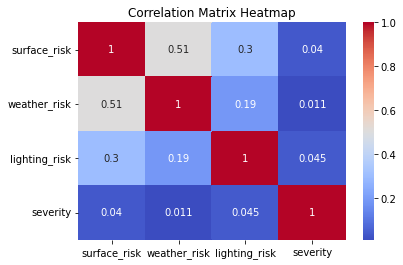

In [241]:
# Create a heatmap of the correlation matrix in the correlation_analysis DataFrame
sns.heatmap(correlation_analysis.corr(), cmap='coolwarm', annot=True)

# Add a title to the plot
plt.title('Correlation Matrix Heatmap')

**My Insight:**

---

The highest correlation between columns are columns weather_risk and surface_risk. This is reasonable because if the weather is poor (Ex: Raining/Snowing), the surface condition will also be poor(Ex: Wet/Covered in snow)

A correlation value of `<0.01` indicates a `weak positive correlation` between the two variables. This means that there is a `slight tendency` for the environmental variables and the severity to move in the same direction, but the relationship is not very strong.

Eventhough there is not a huge difference, we can see that the lighting of the road has the biggest correlation towards the severity of the crash.

**Remember**, this does not mean that the environmental factors does not have an effect on the `amount` of incidents, it only means that an incident that takes in a `high risk` environment does not mean it will result in a `Fatal incident`. 

To see if the most accidents happen in high risk environments we refer to the next question.


### 2.   Do environmental factors effect the count of road traffic accidents in the Year 2017-2019 ❓

We will now create a figure with three subplots, and then plots bar charts showing the number of accidents by road surface, lighting conditions, and weather conditions. 

To create the bar charts, well be using the countplot function from the seaborn library, and then set the titles of each chart using the set_title function. 




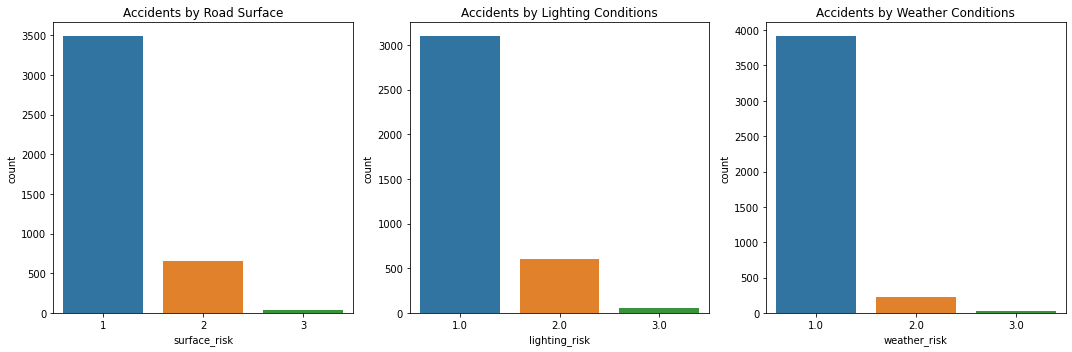

In [242]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Barplot 1
sns.countplot(x='surface_risk', data=correlation_analysis, ax=axes[0])
axes[0].set_title('Accidents by Road Surface')

# Barplot 2
sns.countplot(x='lighting_risk', data=correlation_analysis, ax=axes[1])
axes[1].set_title('Accidents by Lighting Conditions')

# Barplot 3
sns.countplot(x='weather_risk', data=correlation_analysis, ax=axes[2])
axes[2].set_title('Accidents by Weather Conditions')

plt.tight_layout()
plt.show()

**My Insight:**

---

As we can see, most accidents happen in low risk environments. This means that there are other external factors that causes road traffic accidents such as driver driving characteristic(driving speed),distraction, fatigue and vehicle condition.

### 3.  What month of the year does road traffic accidents happen the most? And what time of day does road traffic accident happen the most? In year 2017-2019 ❓

In order to see the spikes in road traffic acident throughout the year/day we will graph a line chart.

First we create a list of the years we want to create a line chart for. Then we create a `loop` that iterates through each year in the years list. 

For each year, it filters the queried_data dataframe to only include rows with the year specified in the datetime column. It then groups the data by the hour of the day using the `groupby()` method and gets the count of rows for each hour using the `size()` method. 

The resulting data is stored in the yearly_counts variable. Finally, it creates a line plot using Seaborn's `lineplot()` function, using the hour of the day as the x-axis and the count of accidents as the y-axis. 

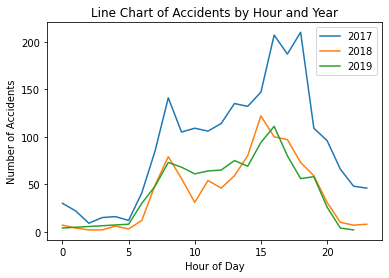

In [243]:
# Create line chart for each year
years = [2017, 2018, 2019]
for year in years:
    yearly_counts = queried_data.loc[queried_data['datetime'].dt.year == year].groupby(queried_data['datetime'].dt.hour).size()
    sns.lineplot(x=yearly_counts.index, y=yearly_counts, label=str(year))

# Customize chart
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title('Line Chart of Accidents by Hour and Year')
plt.legend()

# Show chart
plt.show()

**My Insight:**

---

As we can see there are 2 different spikes in the line graph, after further research we can see a pattern. Every rush hour, there is a significant spike in number of accidents.

The "**Rush**" refers to the volume of traffic, not the speed of its flow. Rush hour may be `5–9 AM (5:00–9:00)` and `4–8 PM (sometimes from 4-9 PM)  (16:00–20:00, sometimes from 16:00-21:00))`.

Source of Rush Hour Definition: https://en.wikipedia.org/wiki/Rush_hour 



We will now plot another line graph but this time, we use month in the `x axis` instead of hours of the day.

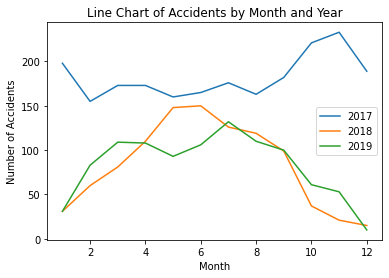

In [244]:
# Create line chart for each year
years = [2017, 2018, 2019]
for year in years:
    yearly_counts = queried_data.loc[queried_data['datetime'].dt.year == year].groupby(queried_data['datetime'].dt.month).size()
    sns.lineplot(x=yearly_counts.index, y=yearly_counts, label=str(year))

# Customize chart
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.title('Line Chart of Accidents by Month and Year')
plt.legend()

# Show chart
plt.show()


**My Insight:**

---

As we can see there are also 2 different spikes in the line graph, during the mid months and the end months. This may be caused by the traffic during the holiday months: summer holiday and winter holday.


### 4. What type of vehicles have the most amount of accident and which type of vehicles experience the most severe crashes in the year 2017-2019 ❓

In order to answer this question we will plot a bar graph to see which type of vehicles experience the most accident. Just like in question 2, we will create a new dataframe.

In [245]:
vehicle_analysis = pd.DataFrame(correlation_analysis[['severity']])

Next we use `.unique` to see all the different categories in the column 'type of vehicle'. Why do we do this? Because we do not want to have a lot of vehicle categories.

In [246]:
vehicles_categories = queried_data['Type of Vehicle'].unique()

print(vehicles_categories)

['Car' 'Pedal cycle' 'M/cycle 50cc and under'
 'Motorcycle over 50cc and up to 125cc'
 'Motorcycle over 125cc and up to 500cc' 'Motorcycle over 500cc'
 'Taxi/Private hire car'
 'Motorcycle 12Motorcycle over 500cccc to Motorcycle over 500cc00cc'
 'Motorcycle Motorcycle over 500cc0cc and under' 'Car0'
 'Pedal cyclePedal cycle'
 'Motorcycle Motorcycle over 500cc0cc to 12Motorcycle over 500cccc'
 'Pedal cycleCar'
 'Motorcycle Motorcycle over 500cc0cc and underPedal cycle'
 'Motorcycle Motorcycle over 500cc0cc and under0' 'Car7' 'Pedal cycle0'
 'CarTaxi/Private hire car'
 'Motorcycle Motorcycle over 500cc0cc and underMotorcycle Motorcycle over 500cc0cc and under']


Based on the categories above, we can see that there are alot of duplicate columns. We will use  `.replace` to break down all these categories into 3 categories: 

*   Car
*   Pedal
* Motorcycle



In [247]:
# replace multiple values in 'text_col'
queried_data['Type of Vehicle'].replace(['M/cycle 50cc and under','Motorcycle over 50cc and up to 125cc','Motorcycle over 125cc and up to 500cc','Motorcycle over 500cc','Motorcycle 12Motorcycle over 500cccc to Motorcycle over 500cc00cc','Motorcycle Motorcycle over 500cc0cc and under','Motorcycle Motorcycle over 500cc0cc to 12Motorcycle over 500cccc','Motorcycle Motorcycle over 500cc0cc and underPedal cycle','Motorcycle Motorcycle over 500cc0cc and under0','Motorcycle Motorcycle over 500cc0cc and underMotorcycle Motorcycle over 500cc0cc and under'], 'Motorcycle', inplace=True)

queried_data['Type of Vehicle'].replace(['Taxi/Private hire car','CarTaxi/Private hire car','Car7','Car0'], 'Car', inplace=True)

queried_data['Type of Vehicle'].replace(['Pedal cycle0','Pedal cycleCar','Pedal cycle','Pedal cyclePedal cycle'], 'Pedal', inplace=True)


In [248]:
vehicle_analysis = pd.merge(vehicle_analysis, queried_data[['Type of Vehicle','datetime']], left_index=True, right_index=True)
vehicle_analysis.head(1)

,severity,Type of Vehicle,datetime
0,1,Car,2018-02-14 10:15:00


We print the column 'Type of Vehicles' to see if there are 3 categories, as we wanted.

In [249]:
vehicles_categories = vehicle_analysis['Type of Vehicle'].unique()

print(vehicles_categories)

['Car' 'Pedal' 'Motorcycle']


In [250]:
vehicle_analysis['year'] = vehicle_analysis['datetime'].dt.year

Now we create a horizontal stacked bar chart showing the count of accidents by type of vehicle and year, using the pivot() method to group and rearrange the data.

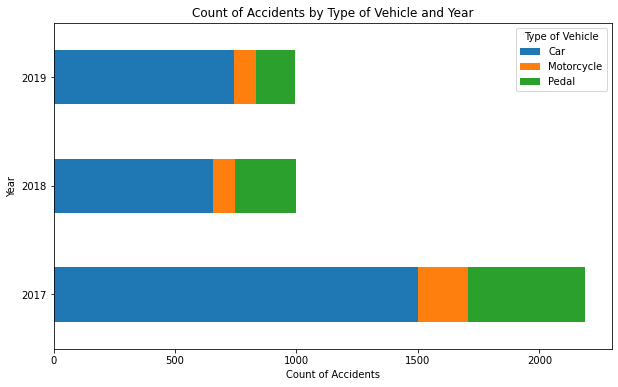

In [251]:
fig, ax = plt.subplots(figsize=(10, 6))

vehicle_analysis_grouped = vehicle_analysis.groupby(['year', 'Type of Vehicle']).size().reset_index(name='Count of Accidents')

vehicle_analysis_grouped.pivot(index='year', columns='Type of Vehicle', values='Count of Accidents').plot(kind='barh', stacked=True, ax=ax)
ax.set_xlabel('Count of Accidents')
ax.set_ylabel('Year')
ax.set_title('Count of Accidents by Type of Vehicle and Year')
plt.show()

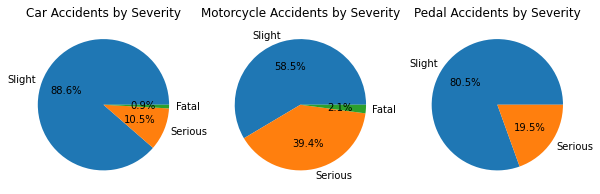

In [252]:
# Filter the data to include accidents for each vehicle
car_vehicles = queried_data[queried_data["Type of Vehicle"] == "Car"]
motorcycle_vehicles = queried_data[queried_data["Type of Vehicle"] == "Motorcycle"]
pedal_vehicles = queried_data[queried_data["Type of Vehicle"] == "Pedal"]

# Get the count of accidents by severity for each vehicle
car_vehicles_counts = car_vehicles["Casualty Severity"].value_counts()
motorcycle_vehicles_counts = motorcycle_vehicles["Casualty Severity"].value_counts()
pedal_vehicles_counts = pedal_vehicles["Casualty Severity"].value_counts()

# Create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 5))


ax1.pie(car_vehicles_counts, labels=car_vehicles_counts.index, autopct='%1.1f%%')
ax1.set_title("Car Accidents by Severity")

ax2.pie(motorcycle_vehicles_counts, labels=motorcycle_vehicles_counts.index, autopct='%1.1f%%')
ax2.set_title("Motorcycle Accidents by Severity")

ax3.pie(pedal_vehicles_counts, labels=pedal_vehicles_counts.index, autopct='%1.1f%%')
ax3.set_title("Pedal Accidents by Severity")


plt.show()

**My Insight:**

---

Across the three years, the bar graph shows that `Car` has the biggest count of road traffic accident, followed by `pedal` and `motorcycle`. Although cars experience the most accidents, it does not mean people in riding a car is more likely to experience a car crash. 

In terms of severity of the accident, `motorcycle` and `pedal` are more likely to have a serious and fatal accident than a `car`.

### 5. Does male or female drivers have a higher likelihood of being involved in a severe accident in the year 2017-2019 ❓

We will plot a piechart to visualize the different severity based on each gender group. Code explanation is written in the code below.

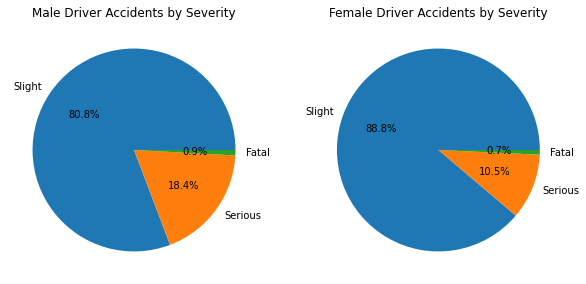

In [253]:
# Filter the data to include only accidents involving male or female drivers
male_accidents = queried_data[queried_data["Sex of Casualty"] == "Male"]
female_accidents = queried_data[queried_data["Sex of Casualty"] == "Female"]

# Get the count of accidents by severity for each gender
male_severity_counts = male_accidents["Casualty Severity"].value_counts()
female_severity_counts = female_accidents["Casualty Severity"].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the male accidents on the left subplot
ax1.pie(male_severity_counts, labels=male_severity_counts.index, autopct='%1.1f%%')
ax1.set_title("Male Driver Accidents by Severity")

# Plot the female accidents on the right subplot
ax2.pie(female_severity_counts, labels=female_severity_counts.index, autopct='%1.1f%%')
ax2.set_title("Female Driver Accidents by Severity")

plt.show()

In [254]:
male_accidents_count = (queried_data["Sex of Casualty"] == "Male").sum()
female_accidents_count = (queried_data["Sex of Casualty"] == "Female").sum()

print("Number of male accidents:", male_accidents_count)
print("Number of female accidents:", female_accidents_count)


Number of male accidents: 2440
Number of female accidents: 1741


**My Insight:**

---

By examining the number of accidents, it appears that male casualties are involved in a greater number of accidents compared to female casualties. However, when considering the severity of accidents, there is no significant difference between the two genders. It is worth noting that males tend to have slightly more serious and fatal accidents than females.

It is possible that the reason for this gender difference in accidents is due to the fact that there are more male casualties on the road than female casualties. However, without knowing the exact ratio of male to female in the road, we cannot make a definitive conclusion on which gender is more prone to road traffic accidents.

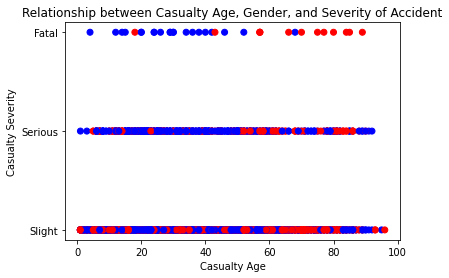

In [255]:
# Create a scatter plot of casualty age and severity, color-coded by gender
plt.scatter(queried_data['Age of Casualty'], queried_data['Casualty Severity'], c=queried_data['Sex of Casualty'].map({'Male': 'blue', 'Female': 'red'}))
plt.xlabel('Casualty Age')
plt.ylabel('Casualty Severity')
plt.title('Relationship between Casualty Age, Gender, and Severity of Accident')
plt.show()

**My Insight:**

---

If we try to see the relationship of the severity of the accident, Gender of the casualty and the Age of casualty, we can see that Fatal severities happen to older woman and middle age to younger man.

We also see that there age of female casualties tend to be older than male casualties.

### B. DESCRIPTIVE STATISTIC 📜

###1. What Age group experience the most road traffic accident in the year 2017-2019 ❓

To start with the descriptive statistic, we will measure the `central tendency` of the Age Column.

In [256]:
print ('Min: ' + str(queried_data['Age of Casualty'].min()))
print ('Mode: ' + str(queried_data['Age of Casualty'].mode()[0]))
print ('Median: ' + str(queried_data['Age of Casualty'].median()))
print ('Mean: ' + str(queried_data['Age of Casualty'].mean()))
print ('Max: ' + str(queried_data['Age of Casualty'].max()))

Min: 1
Mode: 27
Median: 33.0
Mean: 35.96436259268118
Max: 96


The central tendency values for the age of casualties show that the data is skewed to the right, as the mode (most frequent value) is less than the median (middle value) and the mean (average value). The minimum age is 1 year old, the maximum age is 96 years old, and the median age is 33 years old.





To visualize the distribution of the Age of Casualty, we will plot a histogram using `sns.histplot`. We also added dashed lines that represents the mean and median.

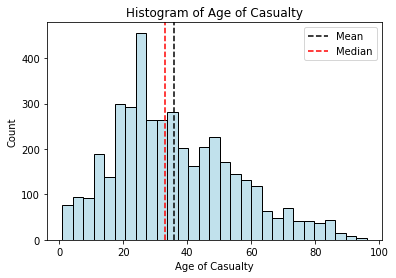

In [257]:
# Create histogram with light blue color
sns.histplot(data=queried_data, x='Age of Casualty', color='lightblue')

# Customize plot
plt.xlabel('Age of Casualty')
plt.ylabel('Count')
plt.title('Histogram of Age of Casualty')

# Add dashed lines for mean and median
plt.axvline(x=queried_data['Age of Casualty'].mean(), color='black', linestyle='--', label='Mean')
plt.axvline(x=queried_data['Age of Casualty'].median(), color='red', linestyle='--', label='Median')

# Add legend
plt.legend()

# Show plot
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


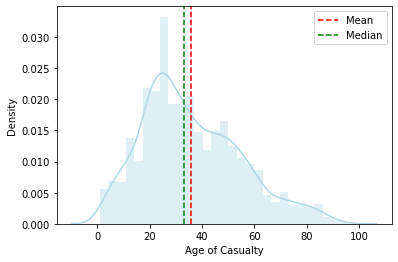

In [258]:
# create histogram with density line
sns.distplot(queried_data['Age of Casualty'], color='lightblue', kde=True)

# add mean and median lines
mean = queried_data['Age of Casualty'].mean()
median = queried_data['Age of Casualty'].median()
plt.axvline(x=mean, color='red', linestyle='--', label='Mean')
plt.axvline(x=median, color='green', linestyle='--', label='Median')

# add legend
plt.legend()

# show plot
plt.show()

In [259]:
from scipy.stats import skew, kurtosis

age_skewness = skew(queried_data['Age of Casualty'])
age_kurtosis = kurtosis(queried_data['Age of Casualty'])

print("Age of Casualty Skewness:", age_skewness)
print("Age of Casualty Kurtosis:", age_kurtosis)

Age of Casualty Skewness: 0.5798764967634124
Age of Casualty Kurtosis: -0.13305837737901882


**My Insight:**

---

The skewness value of 0.58 indicates that the distribution of ages is slightly right-skewed, meaning that there may be more younger casualties (20-40 y/o) than older ones.

The negative kurtosis value of -0.13 indicates that the distribution is slightly less peaked than a normal distribution. This indicates that the distribution has fewer outliers than a normal distribution and that there is less variation in the data.




### C. INFERENTIAL STATISTIC 🗳️

### 1. Is there a relationship/association between the severity of accidents and the number of vehicles involved, or are they unrelated ❓


Null hypothesis **(H0)**: The severity of accidents is not associated with the number of vehicles involved.

Alternative hypothesis **(H1)**: The severity of accidents is associated with the number of vehicles involved.

To test this hypothesis, we use a chi-squared test of independence. First, we would create a contingency table with the counts of accidents for each combination of severity and number of vehicles involved (1-7).

Then, we calculate the chi-squared statistic and associated p-value to determine if the observed association between severity and number of vehicles involved is statistically significant.

In [260]:
from scipy.stats import chi2_contingency


# Set the null hypothesis
null_hypothesis = "The severity of accidents is not associated with the number of vehicles involved."

# Set the alternative hypothesis
alternative_hypothesis = "The severity of accidents is associated with the number of vehicles involved."

# Create a contingency table of the two variables
contingency_table = pd.crosstab(queried_data['Number of Vehicles'], queried_data['Casualty Severity'])

# Perform the chi-squared test and get the p-value
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

print(contingency_table)

# Check if the p-value is less than the significance level
if p < alpha:
    # Reject the null hypothesis and conclude that there is a significant association
    print("Reject the null hypothesis. There is a significant association between the severity of accidents and the number of vehicles involved.")
else:
    # Fail to reject the null hypothesis and conclude that there is no significant association
    print("Fail to reject the null hypothesis. There is no significant association between the severity of accidents and the number of vehicles involved.")

Casualty Severity   Fatal  Serious  Slight
Number of Vehicles                        
1                      21      219     668
2                       9      348    2362
3                       1       45     343
4                       1        9     102
5                       0        5      31
6                       2        4      10
7                       0        0       1
Reject the null hypothesis. There is a significant association between the severity of accidents and the number of vehicles involved.


**My Insight**:


---



The null hypothesis was rejected, meaning that the number of vehicles involved and the severity is dependent.

The small p-value suggest that there is a significant association between "Casualty Severity" and "Number of Vehicles".

## VII. Overall Analysis 📓

To summarize, in terms of overall count of accident, the biggest factor that contributes to the count is traffic. During rush hour/peak holiday months, we can see (over the years 2017-2019) the number of accidents spiked from 60 accidents an hour to 180 accidents. The amount of accidents per hour during rush hour is triple from accidents per hour for the rest of the day. 

In terms of severity of the accident, `motorcycle` and `pedal` are more likely to have a serious and fatal accident than a `car`. 

In terms of age, distribution of ages is slightly left leaning(right-sweked), meaning that there may be more younger casualties than older ones and although the difference is not huge, males tend to have slightly more serious and fatal accidents than females.

## VIII. Additional Code 🔎

In order to plot a map in Tableu, we will need to convert the UK Grid reference to latitude and longitude .

In order to do this, we will use the `pyroj` library.



In [261]:
import pyproj

# Define the projection systems
osgb36 = pyproj.Proj("+init=EPSG:27700")  # UK Ordnance Survey GB projection
wgs84 = pyproj.Proj("+init=EPSG:4326")   # WGS84 projection (latitude, longitude)

# Function to convert easting and northing to latitude and longitude
def convert_to_lat_long(row):
    easting, northing = row["Grid Ref Easting"], row["Grid Ref Northing"]
    longitude, latitude = pyproj.transform(osgb36, wgs84, easting, northing)
    return pd.Series({"latitude": latitude, "longitude": longitude})

# Apply the function to each row and create new columns for the results
queried_data[["latitude", "longitude"]] = queried_data.apply(convert_to_lat_long, axis=1)



/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.8/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-261-7a960ae86318>:10: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  longitude, latitude = pyproj.transform(osgb36, wgs8

In [262]:
queried_data.head()

,Reference Number,Grid Ref Easting,Grid Ref Northing,Number of Vehicles,Road Surface,Lighting Conditions,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,datetime,latitude,longitude
0,52E0458,433065,426415,3,Wet/Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Female,25,2018-02-14 10:15:00,53.733085,-1.500265
1,52F0953,424129,430427,2,Wet/Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Female,74,2018-02-17 16:30:00,53.769632,-1.635405
2,52G0403,429320,436294,2,Wet/Damp,Daylight: street lights present,Fine without high winds,Car,Vehicle or pillion passenger,Serious,Female,65,2018-02-16 09:00:00,53.822098,-1.556096
3,52G0633,418260,442433,2,Wet/Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,81,2018-02-16 11:15:00,53.877777,-1.723737
4,52G0633,418260,442433,2,Wet/Damp,Daylight: street lights present,Fine without high winds,Car,Driver or rider,Slight,Male,70,2018-02-16 11:15:00,53.877777,-1.723737


### Downloading our dataframe to CSV format

Lastly we will. use the `.to_csv` method to convert our pandas dataframe into a CSV file. This CSV file will be used for data visualization in Tableau.

In [263]:
# saving the dataframe
queried_data.to_csv('queried_data.csv')